In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [13]:
sns.set()
%matplotlib inline
%precision 3

'%.3f'

In [14]:
from sklearn import linear_model

In [15]:
student_data_math = pd.read_csv('chap3/student-mat.csv', sep=';')

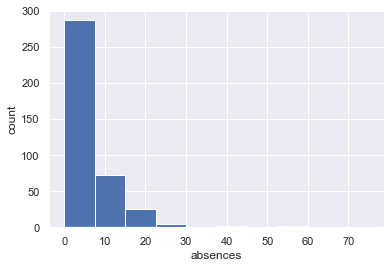

In [16]:
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [17]:
print('平均値:', student_data_math['absences'].mean())
print('中央値:', student_data_math['absences'].median())
print('最頻値:', student_data_math['absences'].mode())

平均値: 5.708860759493671
中央値: 4.0
最頻値: 0    0
dtype: int64


In [21]:
print('分散:', student_data_math['absences'].var(ddof=0))
print('標準偏差:', student_data_math['absences'].std(ddof=0))
print('分散の平方根:', np.sqrt(student_data_math['absences'].var(ddof=0)))

分散: 63.887389841371515
標準偏差: 7.992958766400057
分散の平方根: 7.992958766400057


In [22]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [23]:
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [24]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


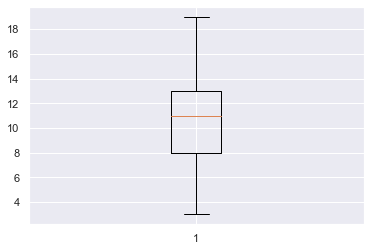

In [25]:
plt.boxplot(student_data_math['G1'])
plt.grid(True)

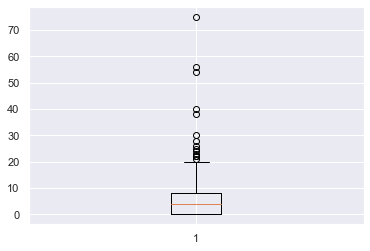

In [26]:
plt.boxplot(student_data_math['absences'])
plt.grid(True)

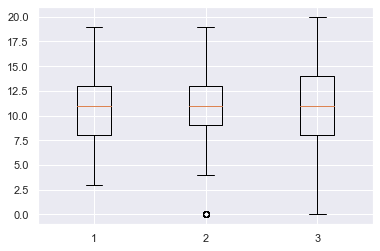

In [28]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [29]:
student_data_math['absences'].std(ddof=0) / student_data_math['absences'].mean()

1.400

In [31]:
student_data_math.std(ddof=0) / student_data_math.mean()

age           0.076330
Medu          0.397673
Fedu          0.431019
traveltime    0.481058
studytime     0.411791
failures      2.222501
famrel        0.227042
freetime      0.308334
goout         0.357645
Dalc          0.600679
Walc          0.561409
health        0.390651
absences      1.400097
G1            0.303881
G2            0.350641
G3            0.439324
dtype: float64

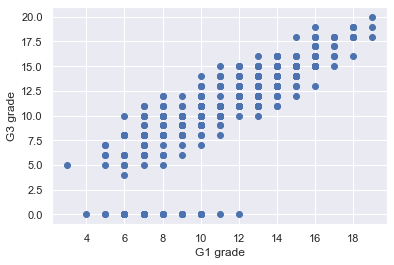

In [32]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [33]:
np.cov(student_data_math['G1'], student_data_math['G3'], ddof=0)

array([[10.989, 12.157],
       [12.157, 20.936]])

In [35]:
print('G1の分散:', student_data_math['G1'].var(ddof=0))
print('G3の分散:', student_data_math['G3'].var(ddof=0))

G1の分散: 10.989161993270304
G3の分散: 20.93647812850505


In [36]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.8014679320174132, 9.00143031228426e-90)

In [37]:
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

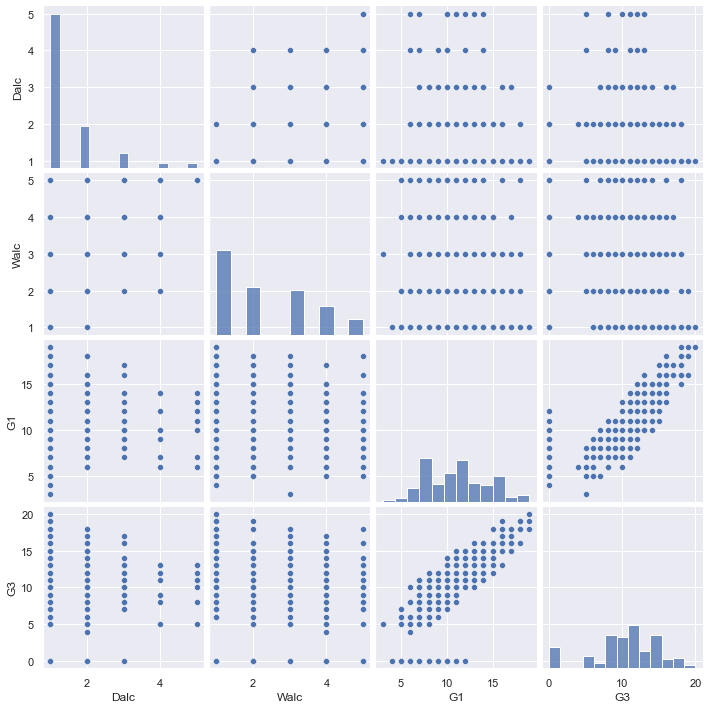

In [39]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [40]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64